In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-white')

In [76]:
#Question 1
data = pd.read_csv("C:/Users/rwnau/Desktop/NN-HW/data.csv")
#Displaying the summary statistics of each of the variables using the describe function
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [77]:
#Checking for nulls in each column using the isna and sum function
data.isna().sum()
#Since the calories variable is the only variable with any null values, just referring to that column
#I am using the fillna function and filling directly with the mean of the calories column and calling inplace = True
#so it will automatically apply it to the dataframe
data['Calories'].fillna(data['Calories'].mean(), inplace = True)
#Checking to see that it filled the null values
data.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [78]:
print('Minimum:')
print(data[['Duration','Pulse']].min())
print('Maximum:')
print(data[['Duration','Pulse']].max())
print('Count:')
print(data[['Duration','Pulse']].count())
print('Mean:')
print(data[['Duration','Pulse']].mean())

Minimum:
Duration    15
Pulse       80
dtype: int64
Maximum:
Duration    300
Pulse       159
dtype: int64
Count:
Duration    169
Pulse       169
dtype: int64
Mean:
Duration     63.846154
Pulse       107.461538
dtype: float64


In [79]:
#Filtering to data with calories between 500 and 1000
data[(data['Calories']>=500)&(data['Calories']<=1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [18]:
#Filtering to data with calories > 500 and pulse < 100
data[(data['Calories']>500)&(data['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [80]:
#Creating modified dataframe without Maxpulse column, using the drop function
df_modified = data.drop(columns = 'Maxpulse')
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [81]:
#Dropping Maxpulse column from the original dataframe using drop function and applying inplace
data.drop(columns = 'Maxpulse', inplace=True)
data

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [82]:
#Converting the calories column to integer data type
data['Calories'] = data['Calories'].astype(int)
#Checking to make sure calories was converted to being integer data type
data['Calories'].dtype

dtype('int32')

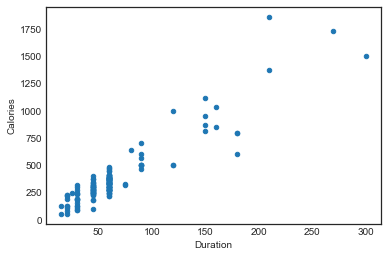

In [83]:
#Using the pandas df.plot function to plot duration on the x axis and calories on the y axis and specifying the kind of plot
#as scatterplot, using plt.show to make it more clean.
data.plot(x='Duration',y='Calories', kind = 'scatter')
plt.show()

In [84]:
#Question 2
#Loading the data in using read_csv function from pandas
salary = pd.read_csv("C:/Users/rwnau/Desktop/NN-HW/Salary_Data.csv")
#Looking at the variables
salary.head()
#Splitting the variables into X and Y, X is independent variables, Y is dependent variable
X = salary.iloc[:, :-1].values
Y = salary.iloc[:, 1].values

In [85]:
#Using the train_test_split function to split the data into train and test sets, calling test_size to specify that
#we want 1/3 of the data for testing.
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, random_state = 0, test_size = 1/3)

In [86]:
#Creating regressor and fitting/training on our training data set
reg = LinearRegression().fit(X_Train,Y_Train)

In [87]:
#Predicting the dependent variable using our trained regressor
Y_Pred = reg.predict(X_Test)

In [88]:
#Using the mean squared error function to find the MSE which takes the actual Y test values and compares with
#the Y values predicted from our model
mean_squared_error(Y_Test,Y_Pred)

21026037.329511296

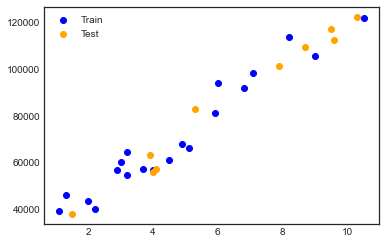

In [89]:
#Using matplotlib scatterplot function to plot both the train and test datasets and using the legend function to discern the difference
plt.scatter(X_Train,Y_Train, color = 'blue')
plt.scatter(X_Test,Y_Test, color = 'orange')
plt.legend(['Train','Test'])
plt.show()